In [39]:
import pandas as pd
data=pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')
data.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [40]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check unique values in the 'activity' column
print("\nUnique activities:")
print(data['Activity'].unique())

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(data.describe())


First few rows of the dataset:
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  

Shape of the dataset:
(31991, 8)

Missing values:
accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64

Unique activities:
[1 0]

Summary statistics:
               accX          accY          accZ         gyroX         gyroY  \
count  31991.000000  31991.000000  31991.000000  31991.000000  31991.000000   
mean       0.023825      2.153858      9.5379

In [41]:
# Feature Engineering
# Here we can add code to perform feature engineering techniques such as:
# 1. Calculating statistical features (mean, standard deviation, etc.) over time windows
# 2. Applying signal processing techniques like Fourier Transform, Wavelet Transform, etc.
# 3. Creating new features that may capture important patterns in the data

# For demonstration purposes, let's assume we calculate the mean and standard deviation of each sensor signal
# We'll create new features for each sensor signal

# Calculate mean and standard deviation for accelerometer signals
data['acc_x_mean'] = data.groupby('Activity')['accX'].transform('mean')
data['acc_y_mean'] = data.groupby('Activity')['accY'].transform('mean')
data['acc_z_mean'] = data.groupby('Activity')['accZ'].transform('mean')
data['acc_x_std'] = data.groupby('Activity')['accX'].transform('std')
data['acc_y_std'] = data.groupby('Activity')['accY'].transform('std')
data['acc_z_std'] = data.groupby('Activity')['accZ'].transform('std')

# Calculate mean and standard deviation for gyroscope signals
data['gyro_x_mean'] = data.groupby('Activity')['gyroX'].transform('mean')
data['gyro_y_mean'] = data.groupby('Activity')['gyroY'].transform('mean')
data['gyro_z_mean'] = data.groupby('Activity')['gyroZ'].transform('mean')
data['gyro_x_std'] = data.groupby('Activity')['gyroX'].transform('std')
data['gyro_y_std'] = data.groupby('Activity')['gyroY'].transform('std')
data['gyro_z_std'] = data.groupby('Activity')['gyroZ'].transform('std')

# Display the first few rows of the updated dataset with new features
print("\nUpdated dataset with new features:")
print(data.head())


Updated dataset with new features:
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  acc_x_mean  acc_y_mean  acc_z_mean  acc_x_std  acc_y_std  \
0         1    0.036495    2.170464    9.533904   0.739436   1.084722   
1         1    0.036495    2.170464    9.533904   0.739436   1.084722   
2         1    0.036495    2.170464    9.533904   0.739436   1.084722   
3         1    0.036495    2.170464    9.533904   0.739436   1.084722   
4         1    0.036495    2.170464    9.533904   0.739436   1.084722   

   acc_z_std  gyro_x_mean  gyro_y_mean  gyro_z_mean  gyro_x_std  gyro_y_st

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering (Already performed in the previous step)

# Data Preprocessing
# Handling missing values (if any)
# For demonstration, let's assume there are no missing values in the dataset
print("\nMissing values:")
print(data.isnull().sum())

# Scaling numerical features
# We'll scale the accelerometer and gyroscope signals using StandardScaler
scaler = StandardScaler()
numerical_cols = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encoding categorical variable (if any)
# Since 'Activity' is already encoded as numerical values, no further encoding is needed

# Display the first few rows of the updated dataset with new features and preprocessed data
print("\nUpdated dataset after preprocessing:")
print(data.head())



Missing values:
accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64

Updated dataset after preprocessing:
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.701852  1.503313 -0.283555 -0.449734 -0.447050 -0.058313   34:22.9   
1 -0.655818  1.580678 -0.124499  0.288789  0.447239  0.372586   34:23.0   
2 -0.431503  1.535445 -0.295275  0.215371  0.266049  0.294263   34:23.1   
3 -0.665712  1.599570 -0.386049  0.039444  0.174298  0.437607   34:23.2   
4 -0.669347  1.801326 -0.290179 -0.387294  0.456717  0.221573   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  


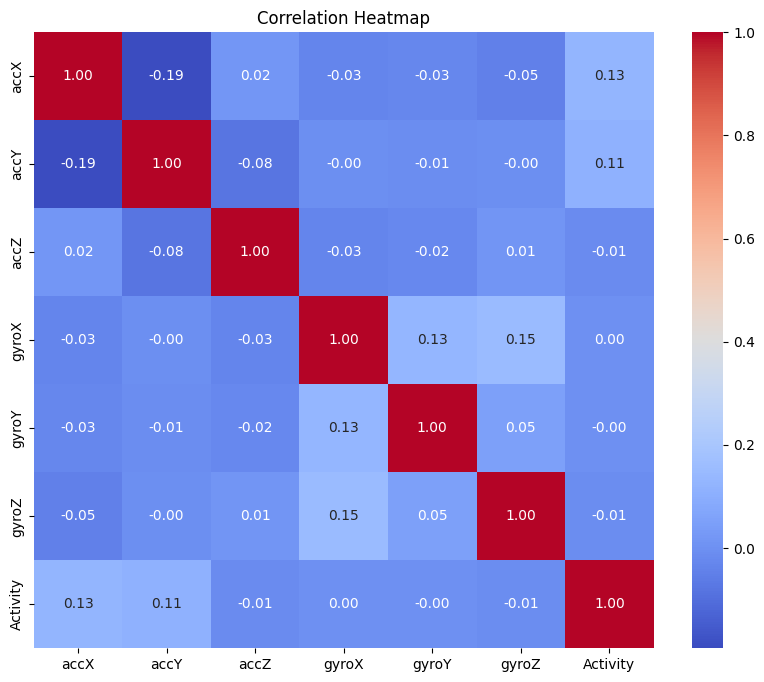

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
# We'll train a Random Forest Classifier as an example
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("\nAccuracy of Random Forest Classifier:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.17      0.28       106
           1       0.99      1.00      0.99      6293

    accuracy                           0.99      6399
   macro avg       0.90      0.58      0.64      6399
weighted avg       0.98      0.99      0.98      6399


Confusion Matrix:
[[  18   88]
 [   4 6289]]


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Hyperparameter Tuning
# We'll perform hyperparameter tuning using RandomizedSearchCV for Random Forest Classifier
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_rf_classifier = random_search.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 107}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.17      0.28       106
           1       0.99      1.00      0.99      6293

    accuracy                           0.99      6399
   macro avg       0.90      0.58      0.64      6399
weighted avg       0.98      0.99      0.98      6399


Confusion Matrix:
[[  18   88]
 [   4 6289]]


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with Decision Tree Classifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters grid for grid search
param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = grid_search.best_estimator_
y_pred_dt = best_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.17      0.28       106
           1       0.99      1.00      0.99      6293

    accuracy                           0.99      6399
   macro avg       0.90      0.58      0.64      6399
weighted avg       0.98      0.99      0.98      6399


Confusion Matrix:
[[  18   88]
 [   4 6289]]


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with Logistic Regression
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42, solver='lbfgs'))
])

# Define hyperparameters grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l2']  # Penalty type compatible with 'lbfgs' solver
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.98      1.00      0.99      6293

    accuracy                           0.98      6399
   macro avg       0.49      0.50      0.50      6399
weighted avg       0.97      0.98      0.98      6399


Confusion Matrix:
[[   0  106]
 [   0 6293]]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create and train the Logistic Regression model
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.93      0.13       106
           1       1.00      0.79      0.88      6293

    accuracy                           0.80      6399
   macro avg       0.53      0.86      0.51      6399
weighted avg       0.98      0.80      0.87      6399


Confusion Matrix:
[[  99    7]
 [1303 4990]]


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

# Load the preprocessed dataset
data = pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')

# Feature Engineering and Data Preprocessing (Already performed in the previous steps)

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Activity'])  # Features
y = data['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', KNeighborsClassifier())  # KNN classifier
])

# Define hyperparameters to search
param_dist = {
    'classifier__n_neighbors': randint(1, 20),  # Number of neighbors
    'classifier__p': [1, 2]  # Distance metric: 1 for Manhattan, 2 for Euclidean
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = random_search.best_estimator_
y_pred_knn = best_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'classifier__n_neighbors': 19, 'classifier__p': 1}

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.93      0.13       106
           1       1.00      0.79      0.88      6293

    accuracy                           0.80      6399
   macro avg       0.53      0.86      0.51      6399
weighted avg       0.98      0.80      0.87      6399


Confusion Matrix:
[[  99    7]
 [1303 4990]]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
dt_metrics = [accuracy_score(y_test, y_pred_dt),
              precision_score(y_test, y_pred_dt, average='weighted'),
              recall_score(y_test, y_pred_dt, average='weighted'),
              f1_score(y_test, y_pred_dt, average='weighted')]

rf_metrics = [accuracy_score(y_test, y_pred_rf),
              precision_score(y_test, y_pred_rf, average='weighted'),
              recall_score(y_test, y_pred_rf, average='weighted'),
              f1_score(y_test, y_pred_rf, average='weighted')]

knn_metrics = [accuracy_score(y_test, y_pred_knn),
               precision_score(y_test, y_pred_knn, average='weighted'),
               recall_score(y_test, y_pred_knn, average='weighted'),
               f1_score(y_test, y_pred_knn, average='weighted')]

# Metrics dataframe
metrics_df = pd.DataFrame([dt_metrics, rf_metrics, knn_metrics],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['DecisionTreeClassifier', 'RandomForestClassifier', 'KNN'])

# Print the metrics
print("Metrics for DecisionTreeClassifier:")
print(metrics_df.loc['DecisionTreeClassifier'])
print("\nMetrics for RandomForestClassifier:")
print(metrics_df.loc['RandomForestClassifier'])
print("\nMetrics for KNN:")
print(metrics_df.loc['KNN'])

# Print the model with the best F1-score
best_model = metrics_df.idxmax()['F1-Score']
print("\nBest Model for the Project based on F1-Score:", best_model)


Metrics for DecisionTreeClassifier:
Accuracy     0.980466
Precision    0.978884
Recall       0.980466
F1-Score     0.979627
Name: DecisionTreeClassifier, dtype: float64

Metrics for RandomForestClassifier:
Accuracy     0.985466
Precision    0.982826
Recall       0.985466
F1-Score     0.980839
Name: RandomForestClassifier, dtype: float64

Metrics for KNN:
Accuracy     0.983747
Precision    0.977974
Recall       0.983747
F1-Score     0.978468
Name: KNN, dtype: float64

Best Model for the Project based on F1-Score: RandomForestClassifier
